# <center>Anastasios Kotronis itp22104<br>DIT161 Project 2022-2023<br>Presentation</center>

## Tools used
- python
 - streamlit / plotly-express: Interactive ploting/visualization
 - pandas / numpy: Data processing
 - skelearn / dython: Modeling, statistics

# <center>Part A<br>U.S. International Air Traffic data (1990-2020)</center>

<h2>Schema <a style="font-size:18px" href="https://drawsql.app/teams/akotronis-team/diagrams/project-1" target="_blank">Draw SQL free online tool</a></h2>

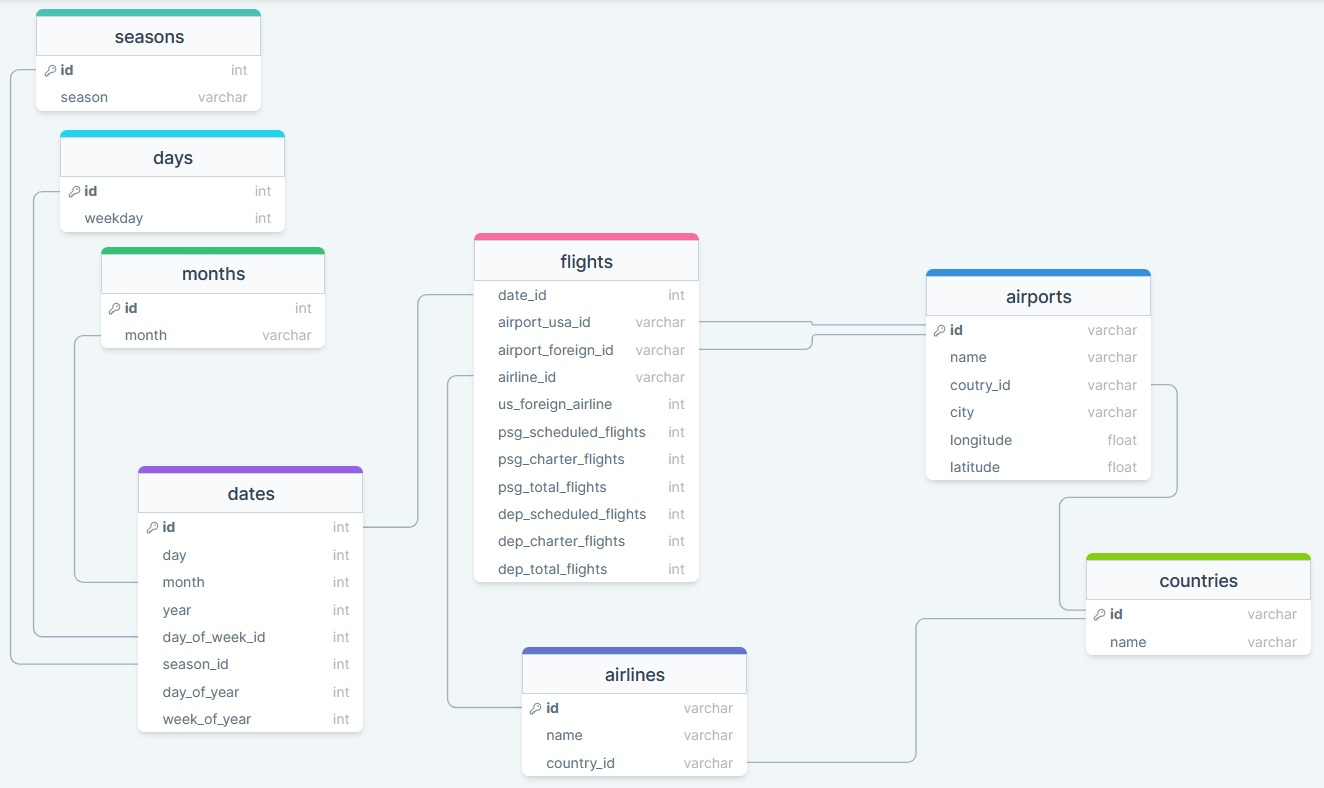

## Fact table (flights)

- We use **passengers** and **departures** datasets from [here](https://www.kaggle.com/datasets/parulpandey/us-international-air-traffic-data?resource=download)
- **date**, **airports** (usa-foreign) and **carrier** columns uniquely identify entries of each dataframe
 - We join **passengers** and **departures** dataframes on these keys
 
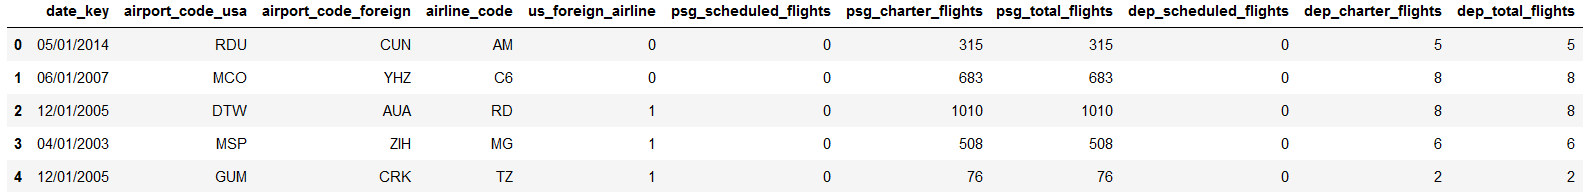

## Dimension 1 (dates)

- We use the **date_key** column of the fact table to make the dimension table for dates
- From the date we create new columns for the dimension table which we will use for our analysis
- We create new tables **seasons**, **days**, **months** and use integer foreign keys in the dates table

## Dimension 2 (airlines)

- We use **carrier-codes.csv** from [here](https://github.com/cmpolis/lets-explore-dataset-1/blob/master/data/carrier-codes.csv) and **Airlines.csv** from [here](http://www.lsv.fr/~sirangel/teaching/dataset/airlines.txt)
- The above IATA/ICAO code entries cover **93.0%** of our fact table entries (**carrier** column) so we also use [wiki page](https://en.wikipedia.org/wiki/List_of_airline_codes) to reach **95.7%**
- We use **countries** information from [here](https://www.iban.com/country-codes) for the country key


## Dimension 3 (airports)

- We ue data from [here](https://datahub.io/core/airport-codes#resource-airport-codes_zip) and also from [here](http://www.lsv.fr/~sirangel/teaching/dataset/airports.txt)
- We use **countries** information from [here](https://www.iban.com/country-codes) for the country key


## We make sure
- **airports** table has no null **coutry_id** and **name** entries
- **airlines** table has no null **coutry_id** and **name** entries
- **flights** table has no null entries
- **flights** table has all entries with **airport** and **airline** ids in the corresponding dimension tables

## Business Scenarios
- **Scenario 1**: A US company wants to open a new duty free store and looks for the busiest airports in US
- **Scenario 2**: An airline wants to inspect the average number of flights per type and month/season level for ticket distribution planning
- **Scenario 3**: US government wants to know the representation of US domestic airlines in flights with one US airport endpoint
- **Scenario 4**: Airlines traffic is investigated taking into account the number of passengers and the number of flights

## Scenario 1

A US company wants to open a new duty free store and looks for the busiest airports in US

We use the **passengers** information

- **Input**
 - A range of years to examine
 - The number of busiest airports to identify
- **Output**
 - Airport ranking
 - Number of Passengers per airport in given year range (Total)
 - Number of Passengers per airport in given year range (Per year)
- **Steps**
 - Filter for year range
 - Group by US airports(/years)
 - Sum passengers
 - Sort descending
 - Keep top results

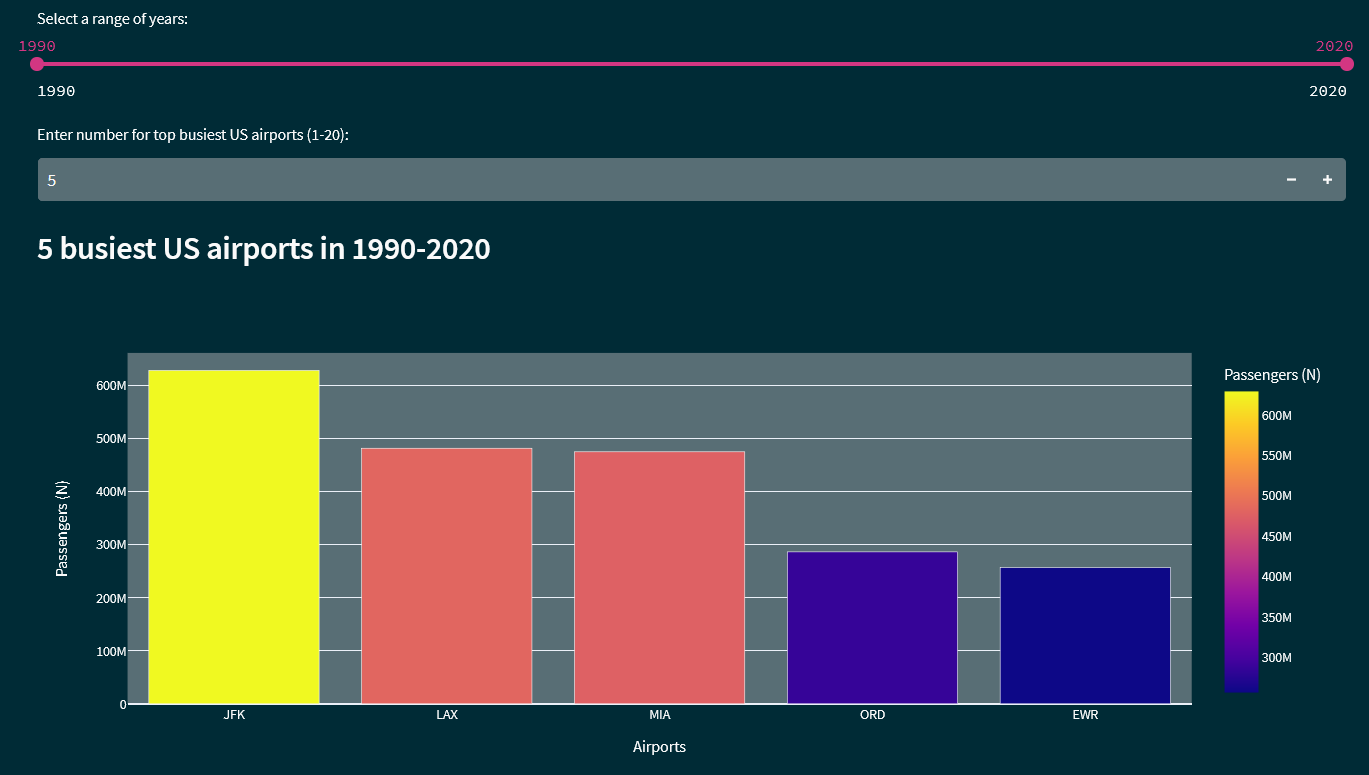

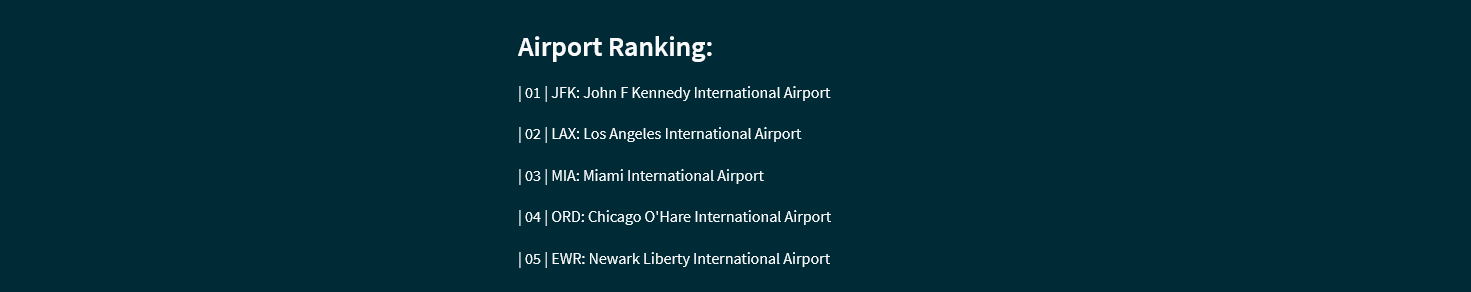

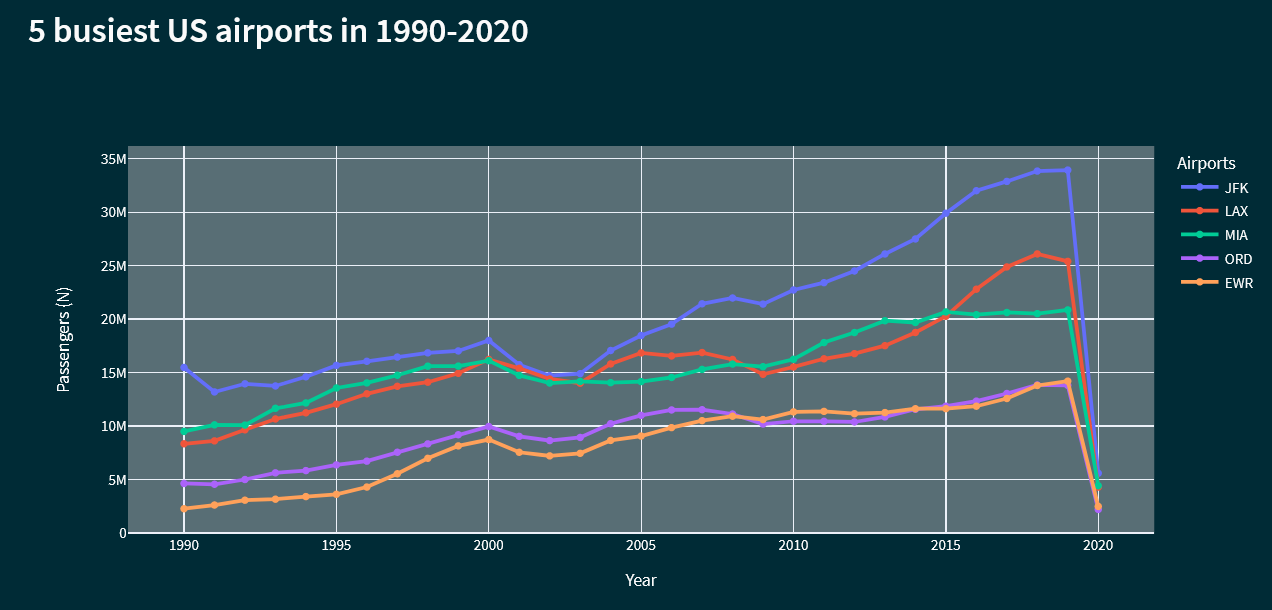

## Scenario 2

An airline wants to inspect the average number of flights per type and month/season level for ticket distribution planning

- **Input**
 - A range of years to examine
 - Period type (Per month/season)
 - Flight type (Charter/Scheduled/Both)
 - Airline
- **Output**
 - Average number of selected flight type(s) for the selected airline in given range of years per period type
- **Steps**
 - Filter for year range and airline
 - Group by period type and by year
 - Sum flight type
 - Group by period type
 - Mean aggregate flight type

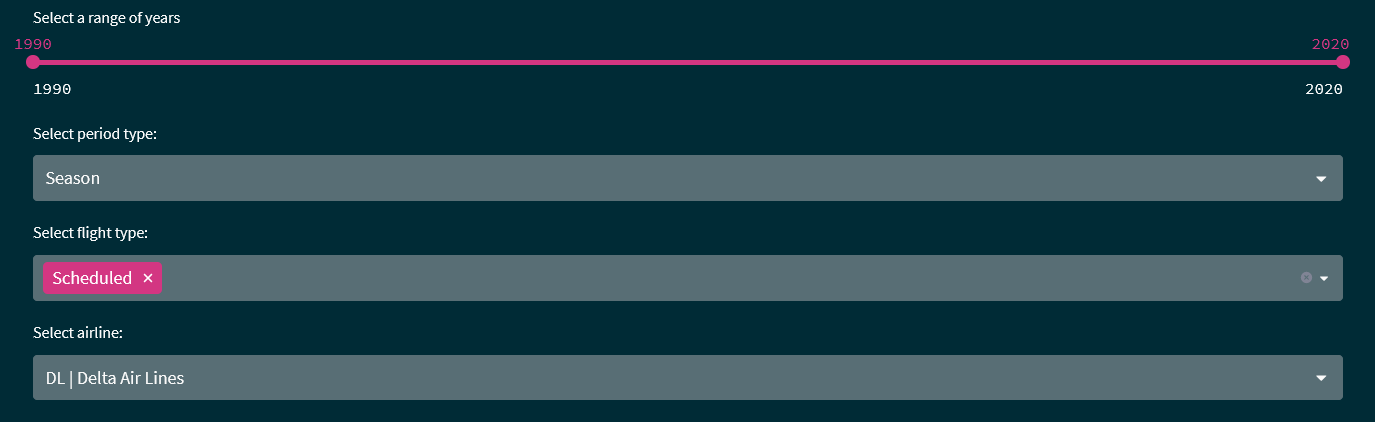

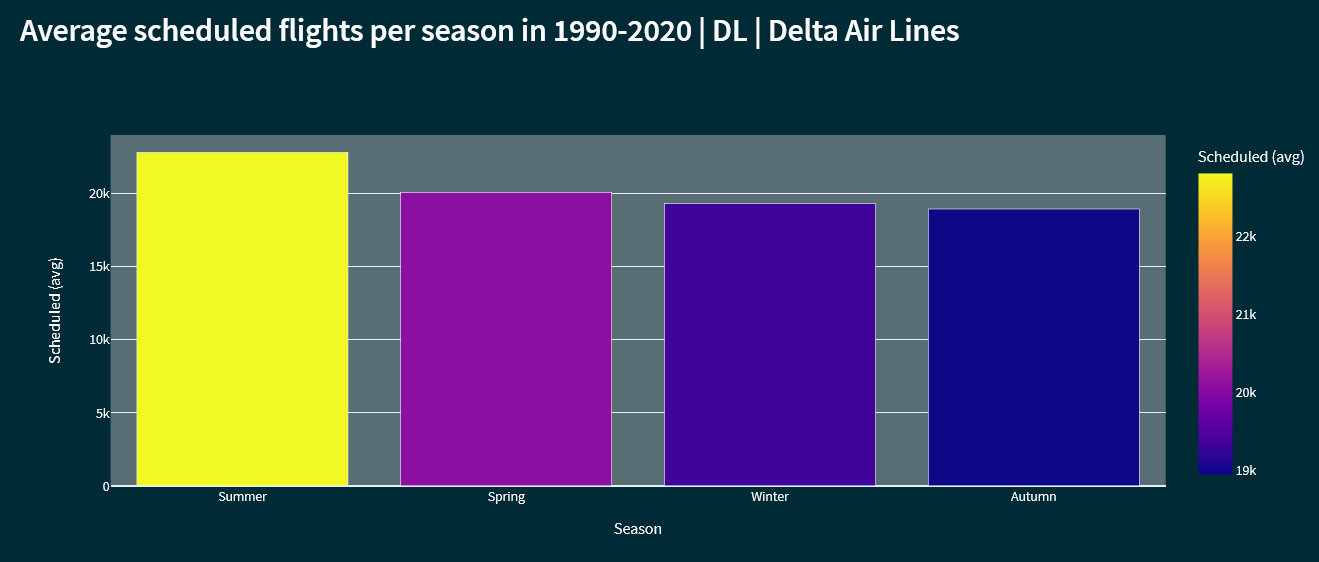

## Scenario 3

US government wants to know the representation of US domestic airlines in flights with one US airport endpoint

- **Input**
 - A range of years to examine
 - Airline
- **Output**
 - US domesic vs Foreign airline per year and in Total
- **Steps**
 - Filter for year range
 - Group by year and us/foreign
 - Sum aggregate
 - Percents within groups

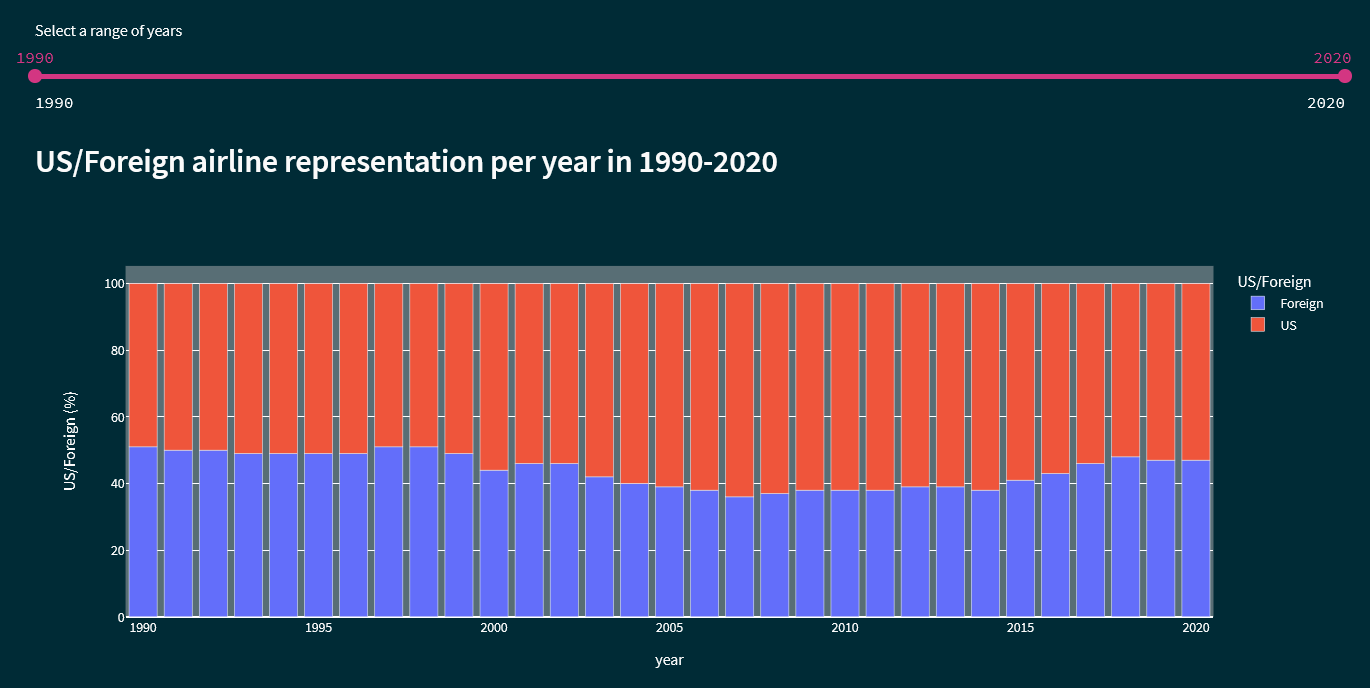

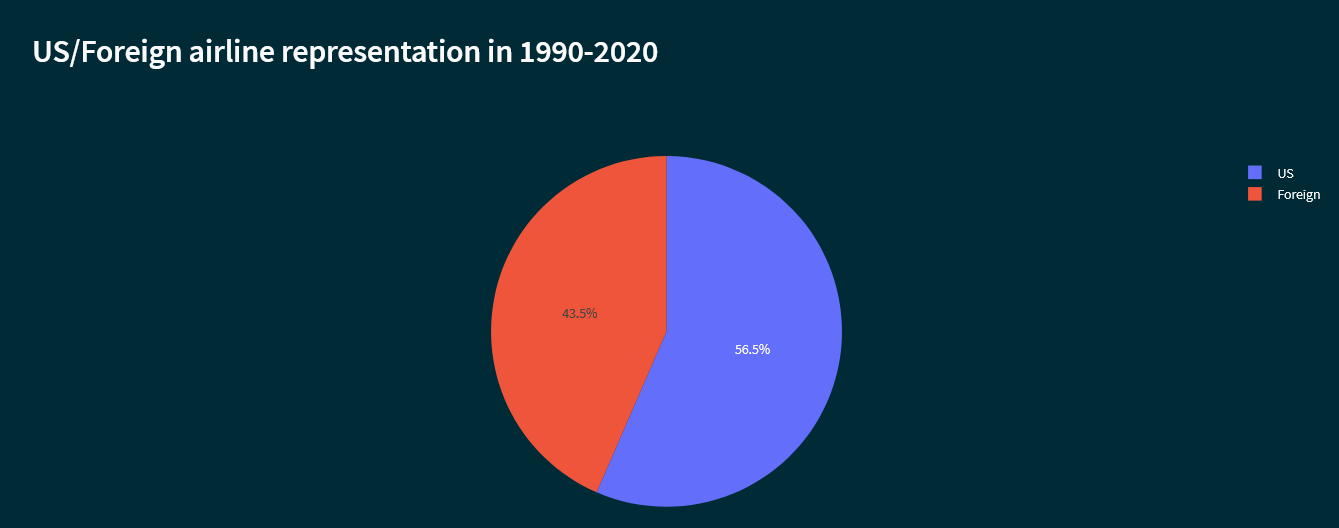

## Scenario 4

Airlines traffic is investigated taking into account the number of **passengers** and the number of **flights**

Flights and passengers are correlated but characterize traffic in a different way since passengers directly map to profit but flights may not if plains are not full

Correlation matrix:

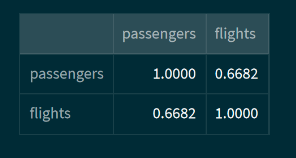

We define airline traffic as linear combination of **passengers** and **flights**.

Weight $x \in [0, 10]$ is selected as the **passengers** factor and **flights** will be assigned $1−\frac{x}{10}$

- **Input**
 - Airlines to include (US/Foreign/Both)
 - Passengers factor $x \in (0,10)$
 - The number of busiest airports to identify based on the linear combinations variable 
- **Output**
 - Airlines ranking based on the linear combinations variable 

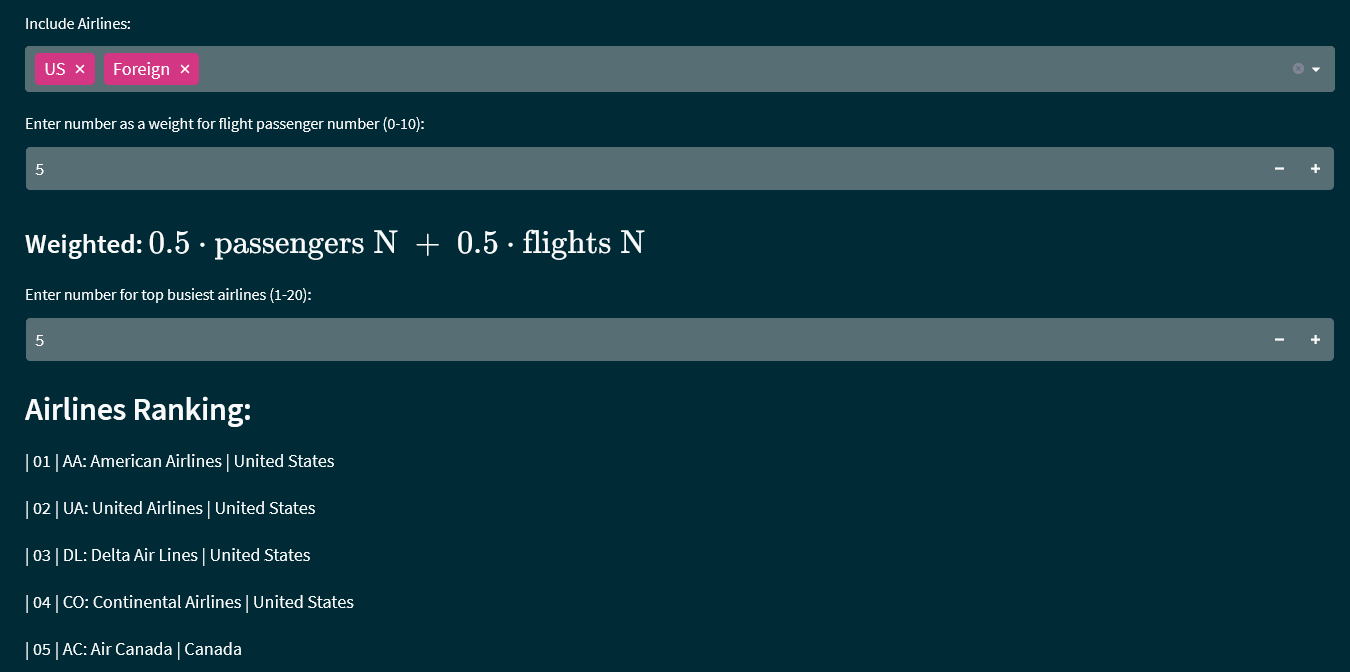

# <center>Part B<br>San Francisco International Airport Air Traffic Statistics</center>

We work with **passengers** data

- Drop cases marked as *inactive*
- Drop cases with missing IATA code
- Remove **year** from **activity period**
- One Hot Encode categorical features, Normalize floats

Experiment with `SelectKBest` class of `sklearn.feature_selection` to inspect feature importances and keep/drop if needed

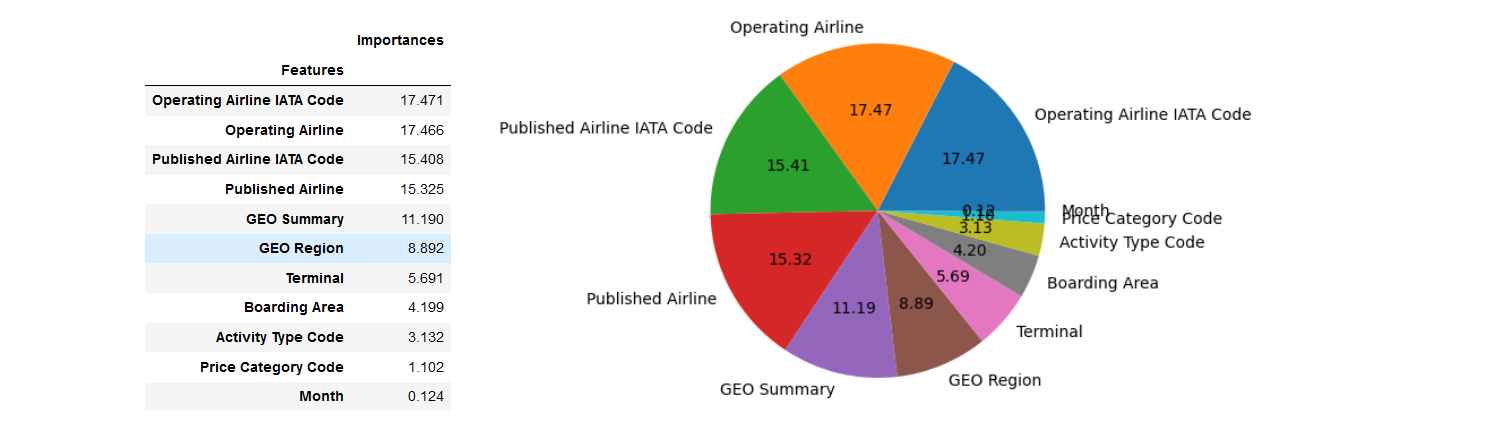

Experiment with `associations` method of `dython.nominal` to inspect feature correlections and keep/drop if needed

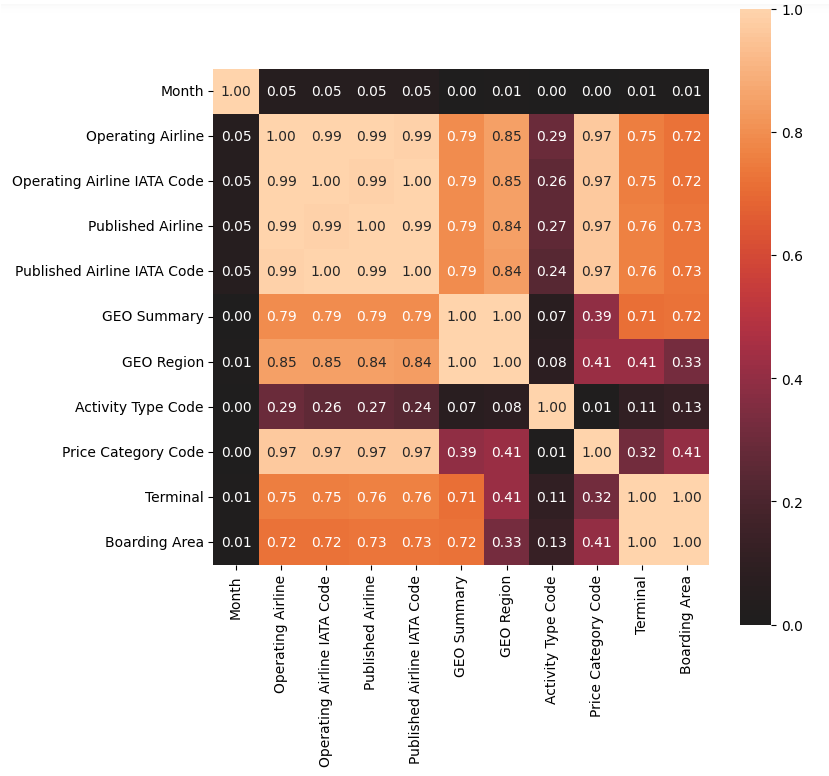

## Classification

Create classes in in the instructions and examine if they are balanced or not

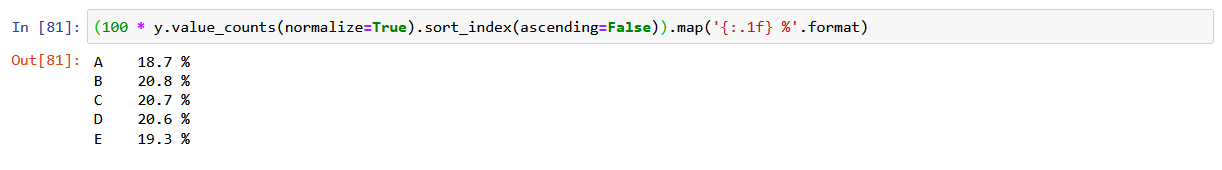

Split data to **train** and **test**

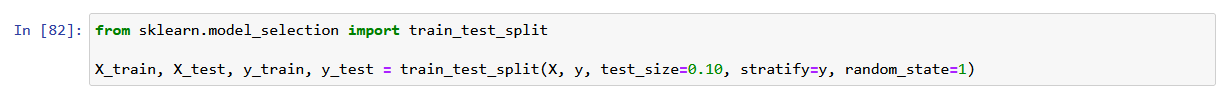

Define classifier models

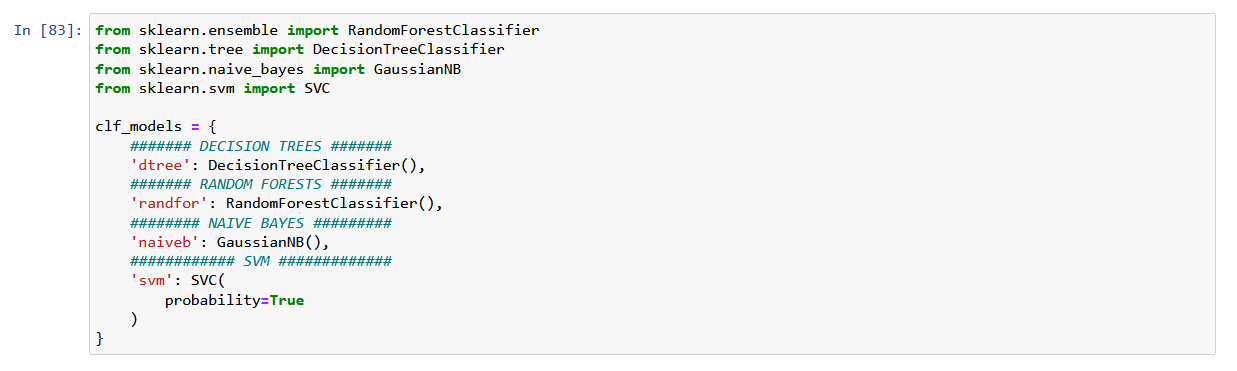

Define performance metrics to search best model based on one of these and choose one

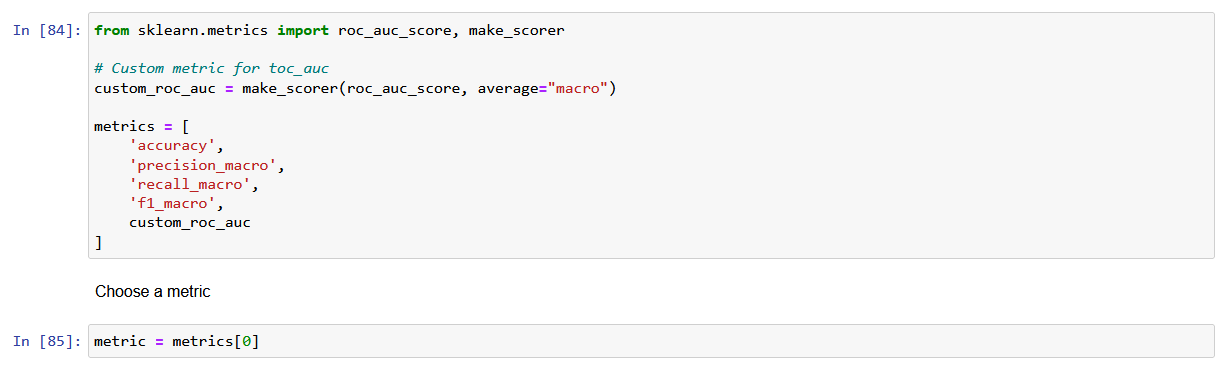

### Decision Trees - Initial model

**Train data**

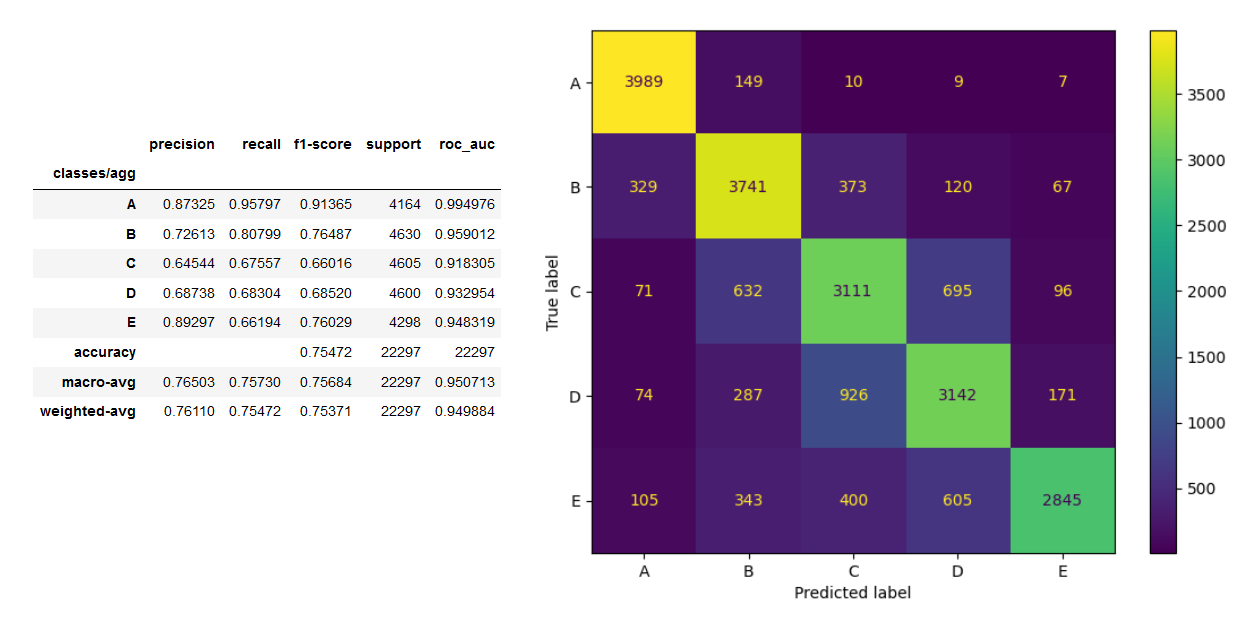

### Decision Trees - Initial model

**Test data**

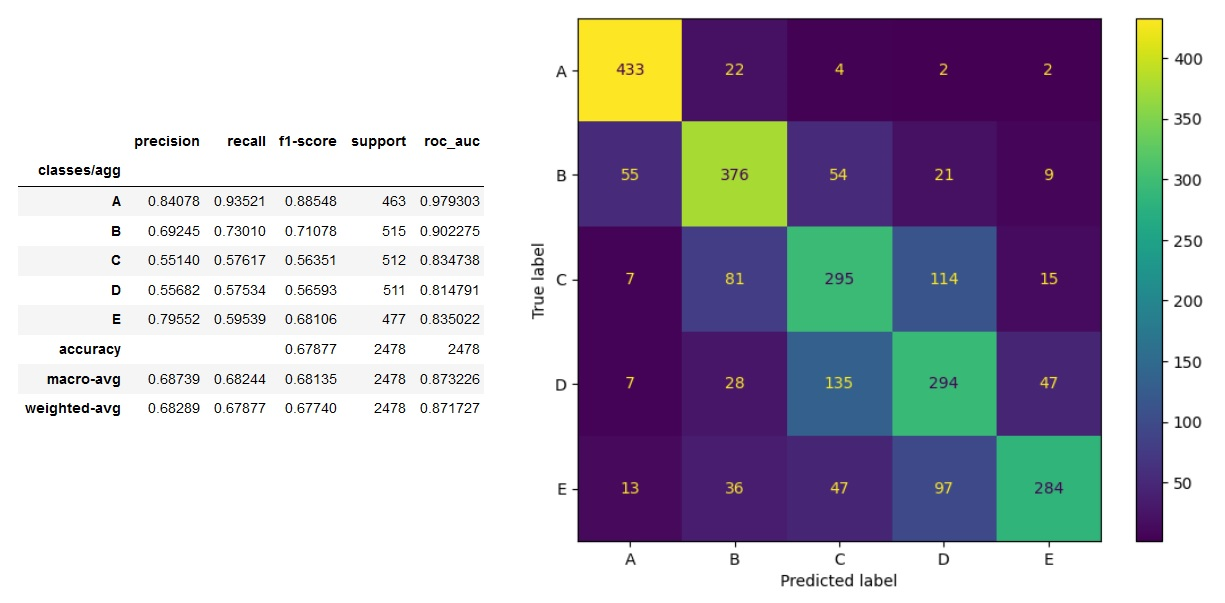

### Decision Trees - Best model search

- Define hyperparameters to search for best model with `GridSearchCV` of `sklearn.model_selection`
- Combine with *5-fold cross validation* using `StratifiedKFold` of `sklearn.model_selection`

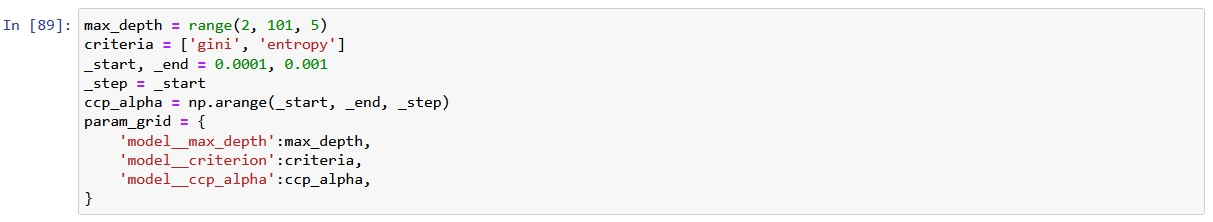

### Decision Trees - Best model

- Best model parameters
- Plot `max_depth` values / mean model's accuracy on cross validation

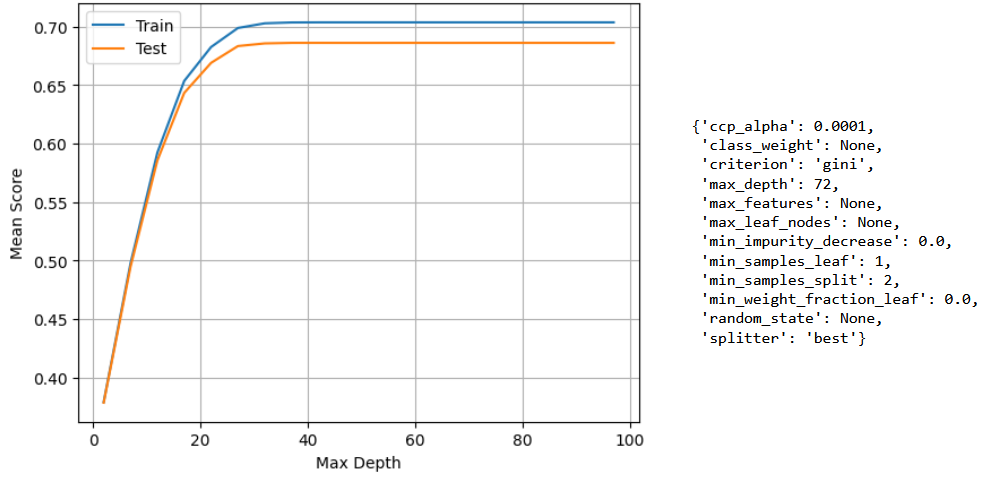

### Decision Trees - Best model

**Train data**

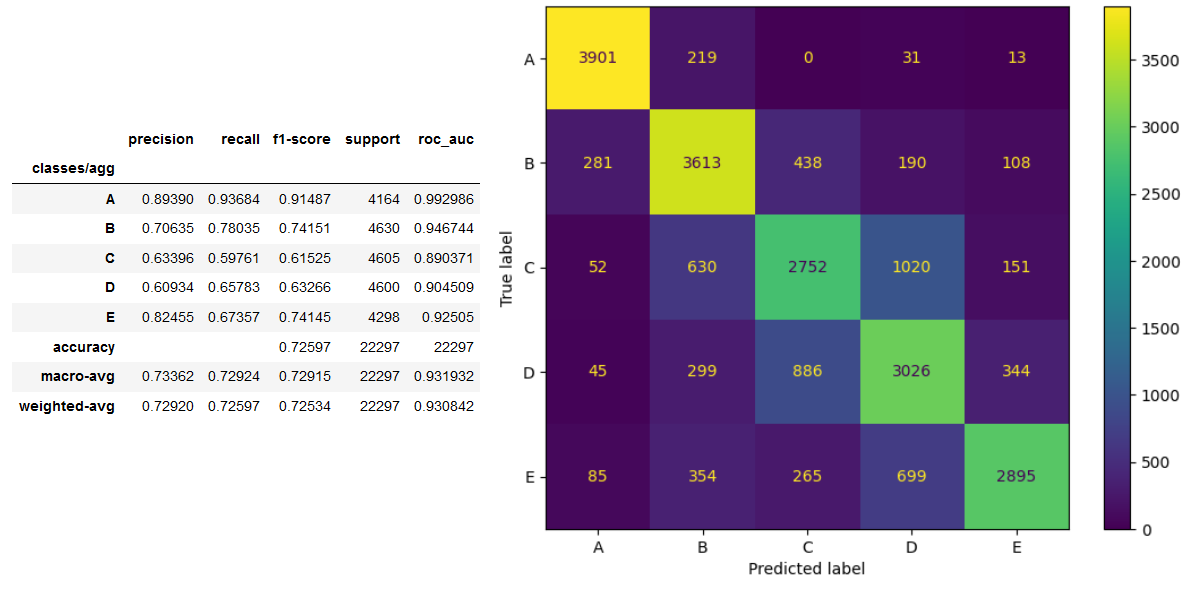

### Decision Trees - Best model

**Test data**

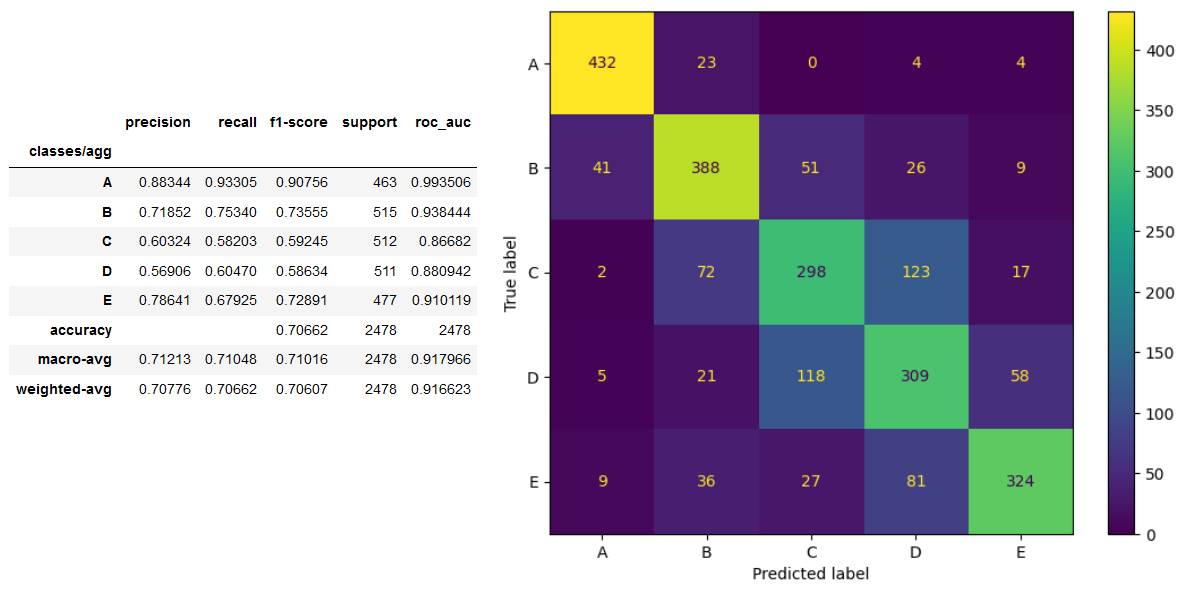

### Random Forests - Initial model

**Train data**

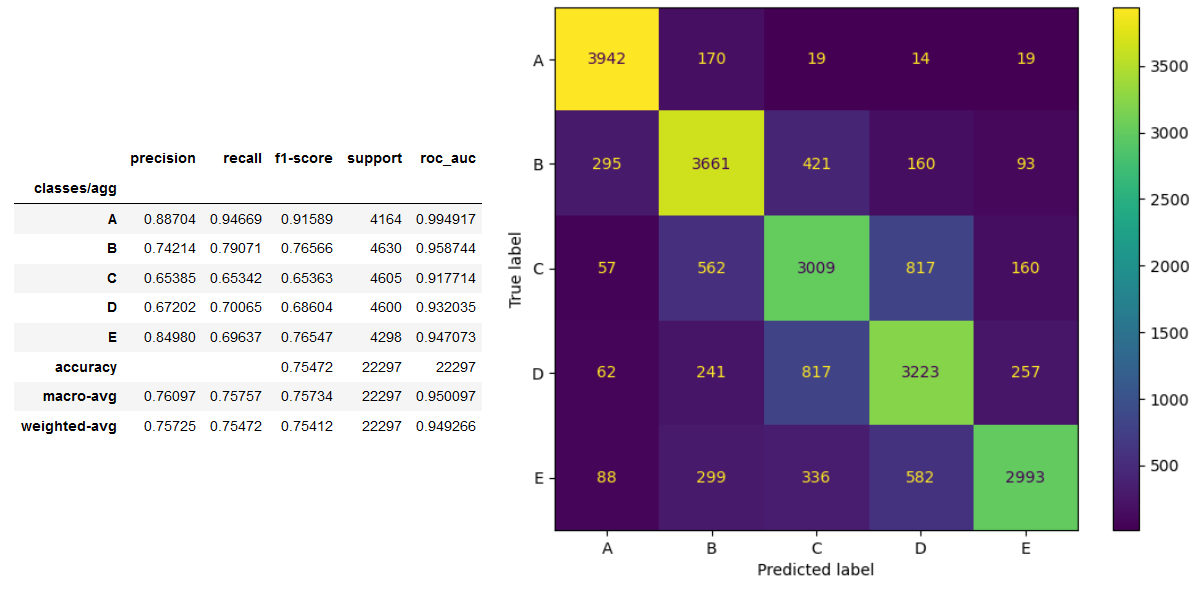

### Random Forests - Initial model

**Test data**

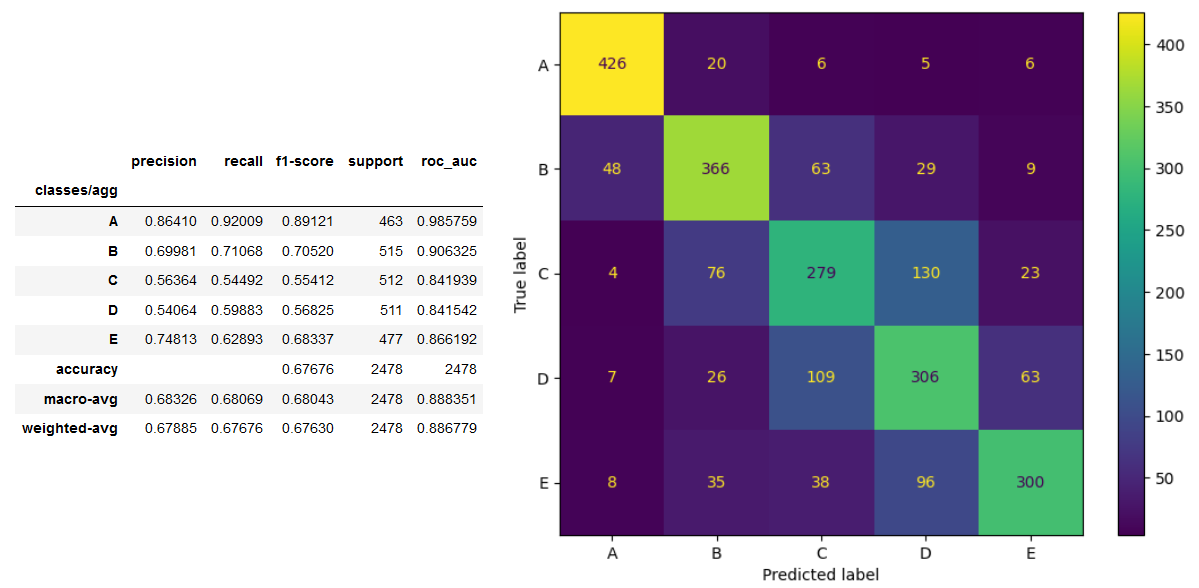

### Random Forests - Best model search

- Define hyperparameters to search for best model with `GridSearchCV` of `sklearn.model_selection`
- Combine with *5-fold cross validation* using `StratifiedKFold` of `sklearn.model_selection`

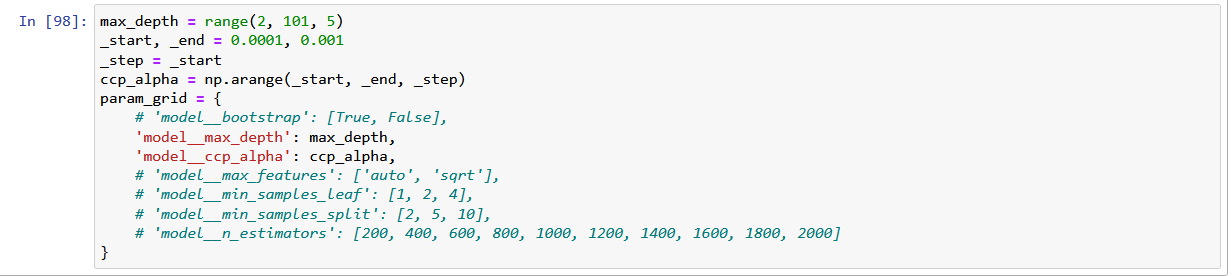

### Random Forests - Best model

- Best model parameters
- Plot `max_depth` values / mean model's accuracy on cross validation

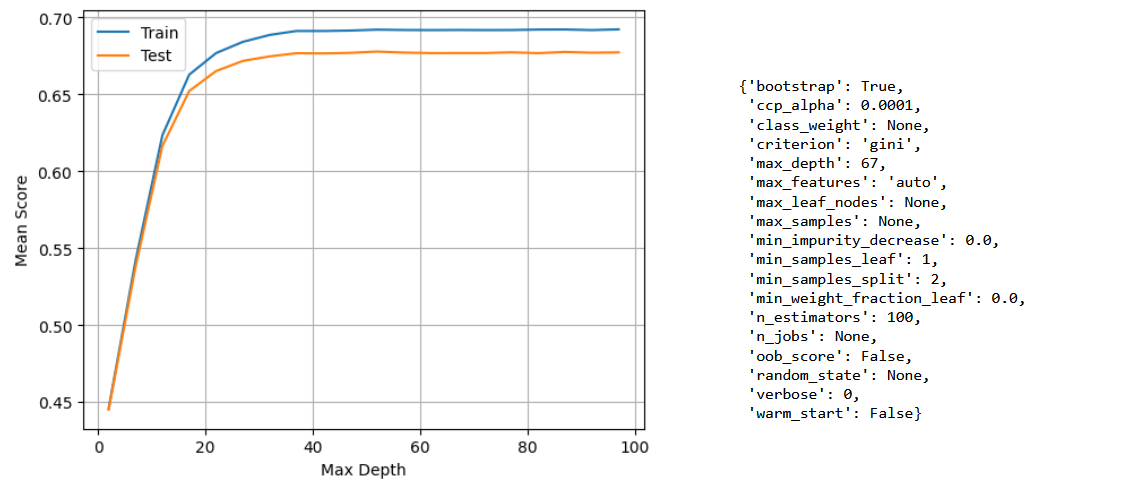

### Random forests - Best model

**Train data**

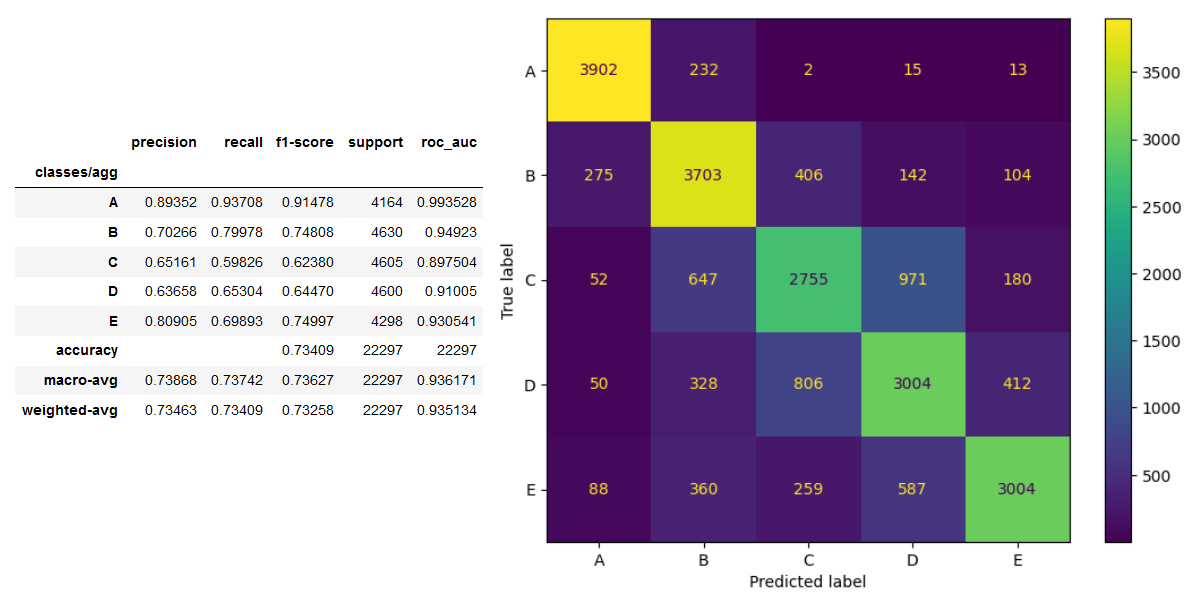

### Random forest - Best model

**Test data**

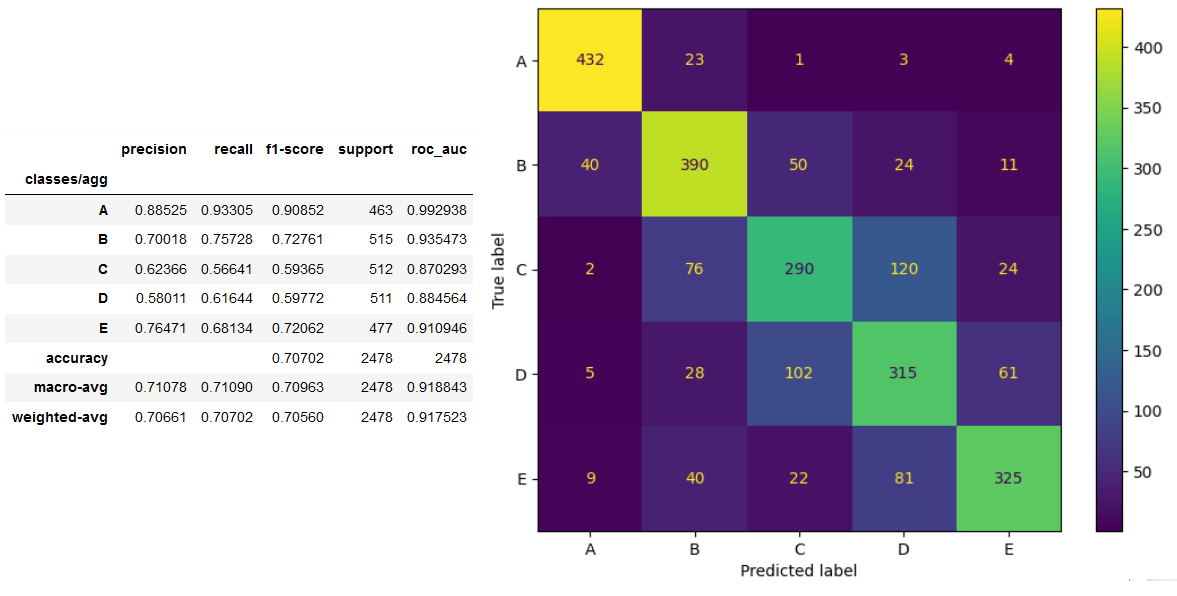

### Naive Bayes - Initial model

**Train data**

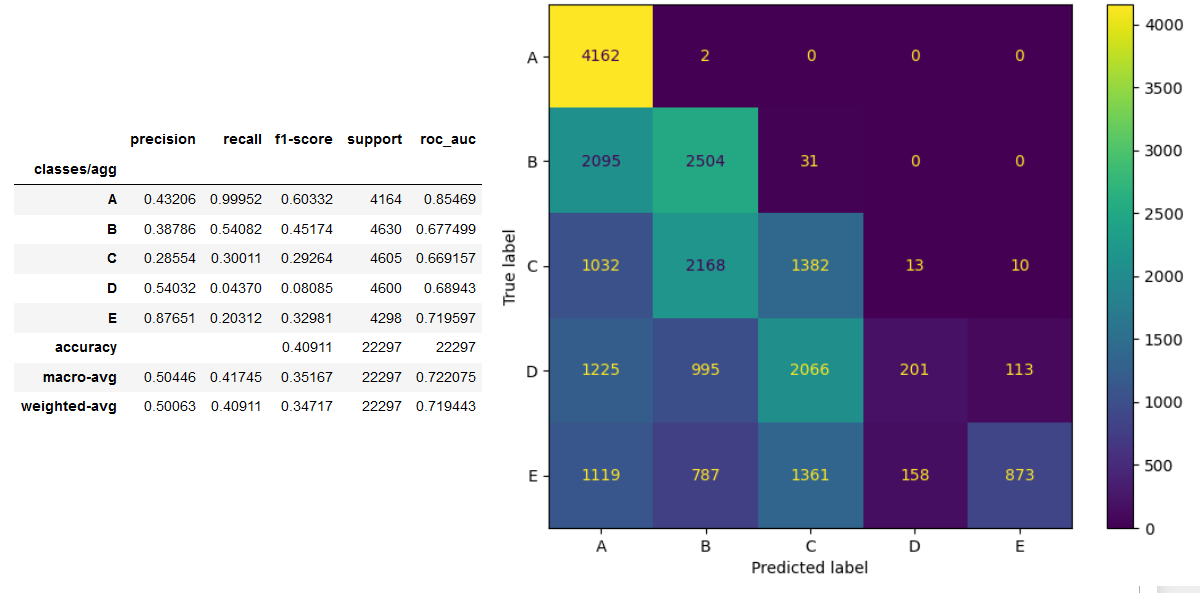

### Naive Bayes - Initial model

**Test data**

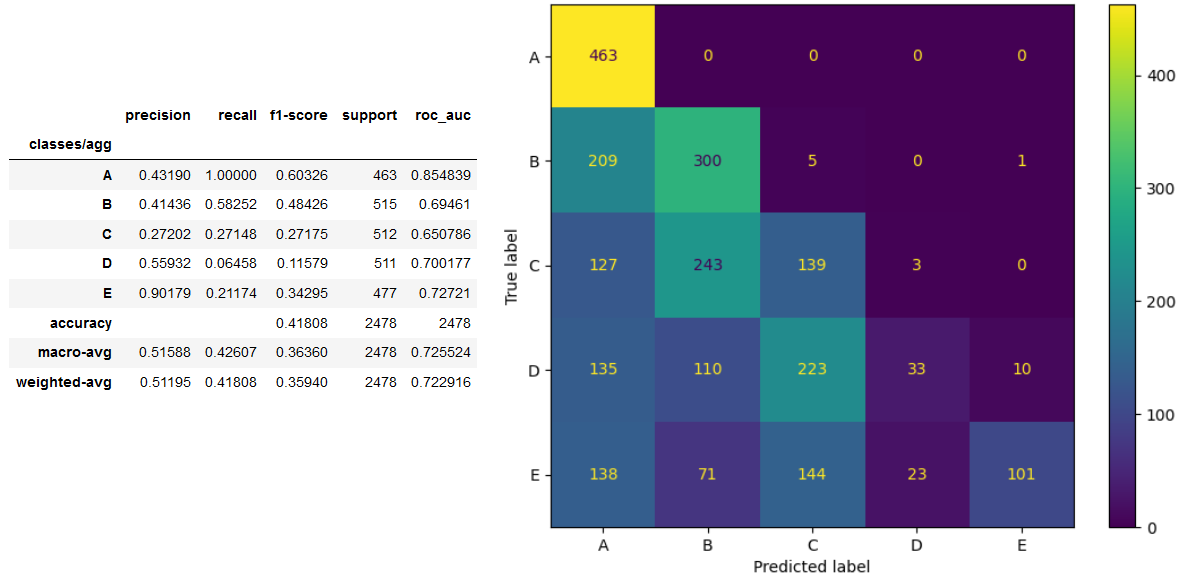

### Naive Bayes - Best model search

- Define hyperparameters to search for best model with `GridSearchCV` of `sklearn.model_selection`
- Combine with *5-fold cross validation* using `StratifiedKFold` of `sklearn.model_selection`

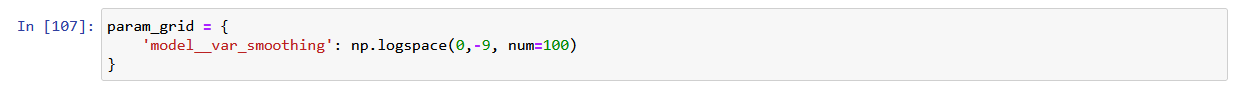

### Naive Bayes - Best model

- Best model parameters
- Plot `var_smoothing` values / mean model's accuracy on cross validation

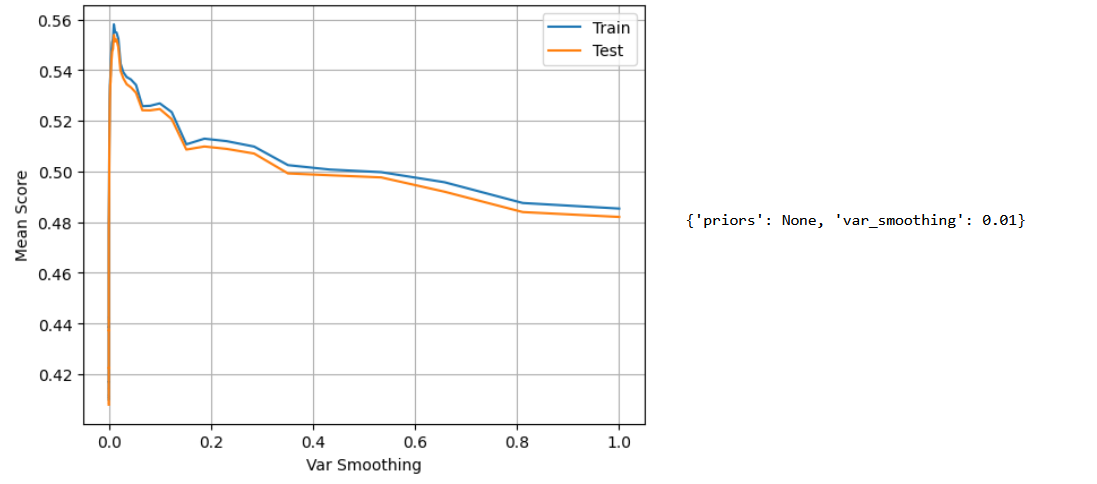

### Naive Bayes - Best model

**Train data**

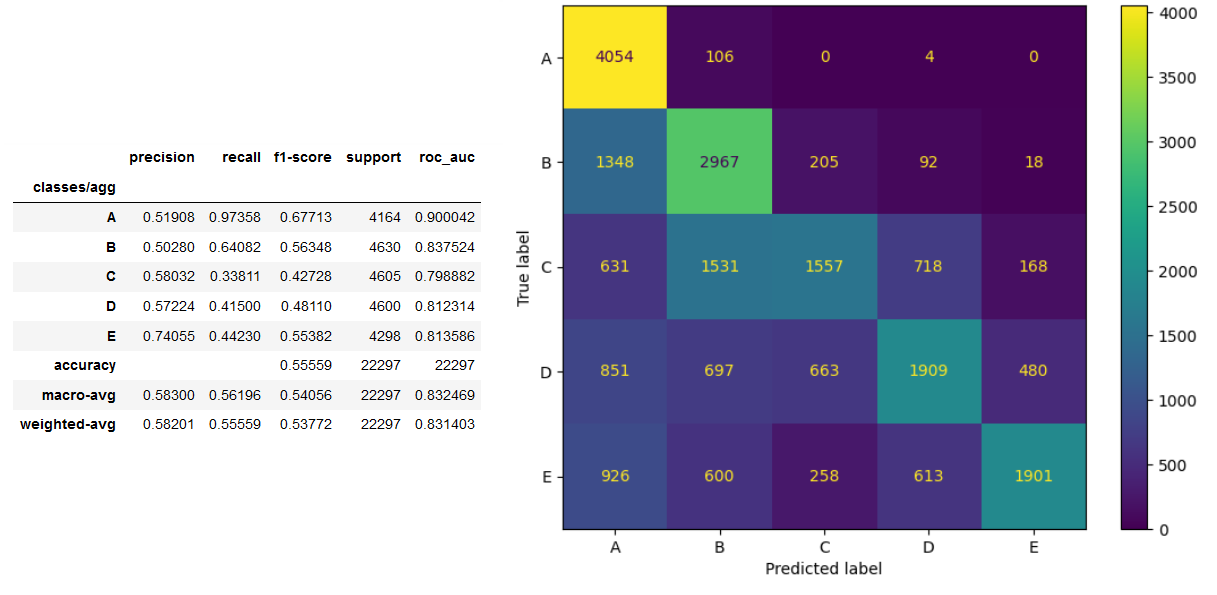

### Naive Bayes - Best model

**Test data**

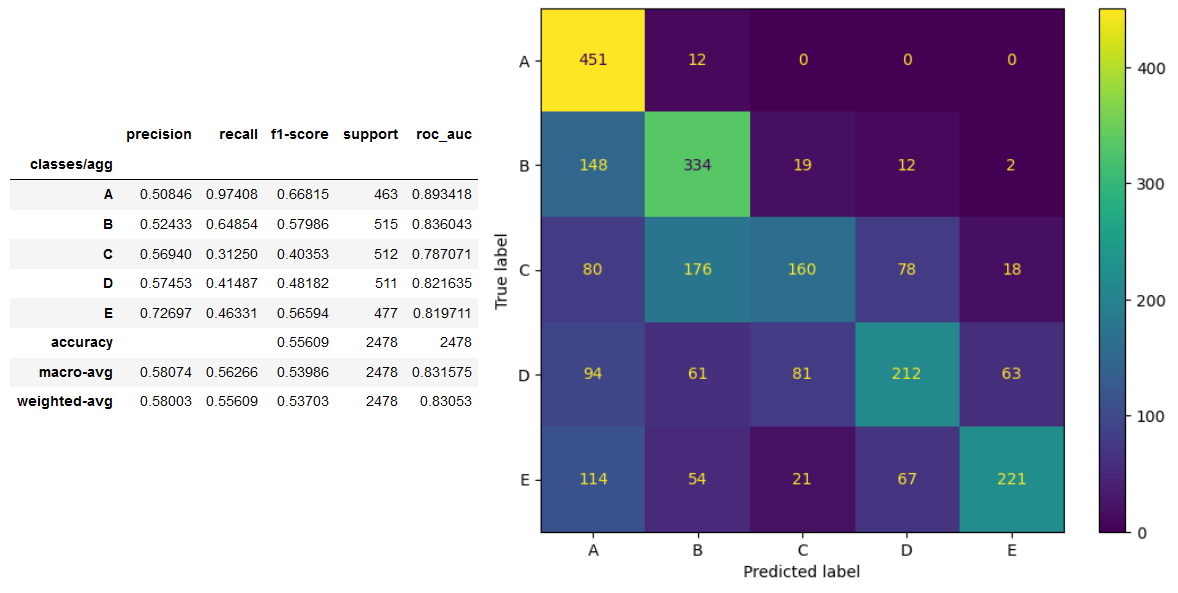

### Compare best models accuracy

- Decesion Trees best: **0,70662**
- <span style="color:red">**Random forest**</span> best: **0,70702**
- Naive Bayes best: **0,55609**

## Regression

Examine target variable distribution (skewed)

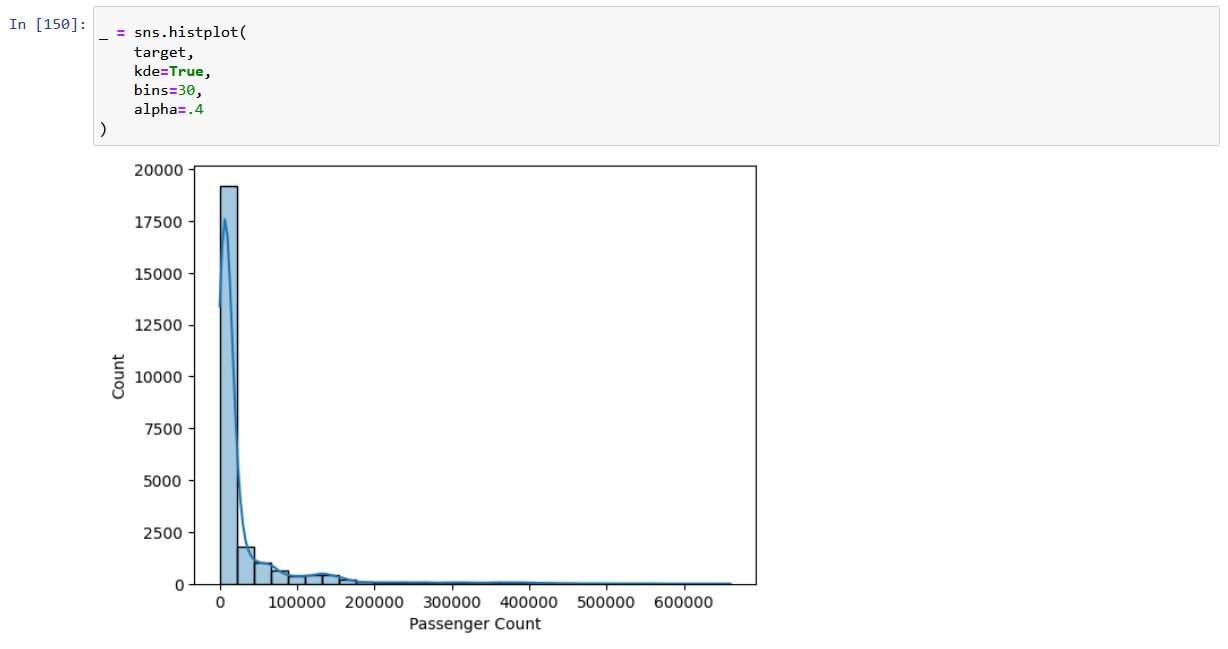

Transform target variable to eliminate skewness

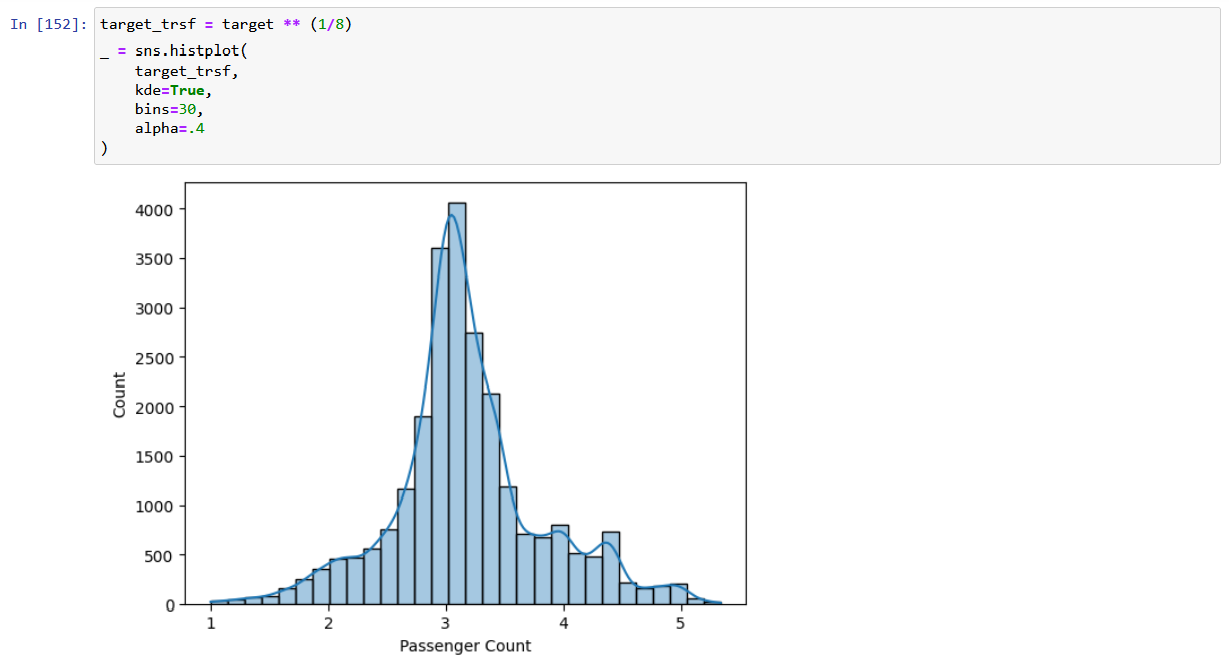

Define classifier models

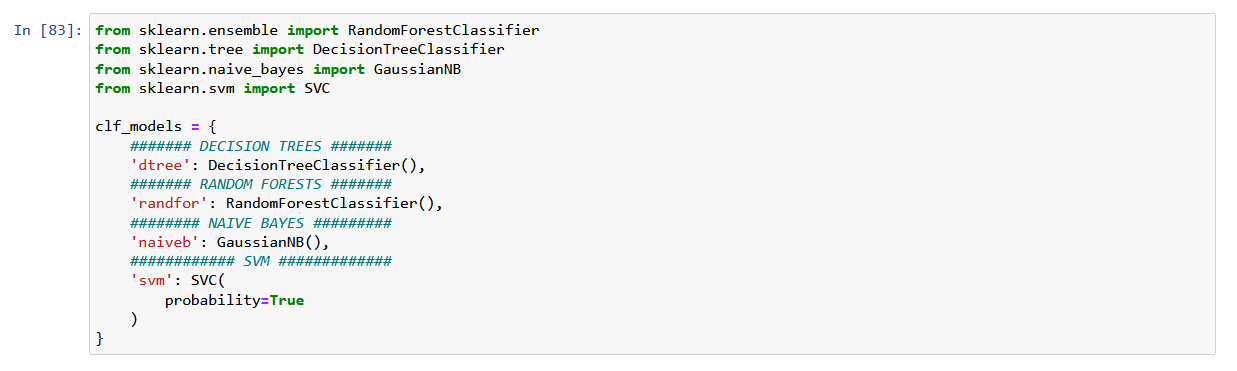

Define performance metrics to search best model based on one of these and choose one

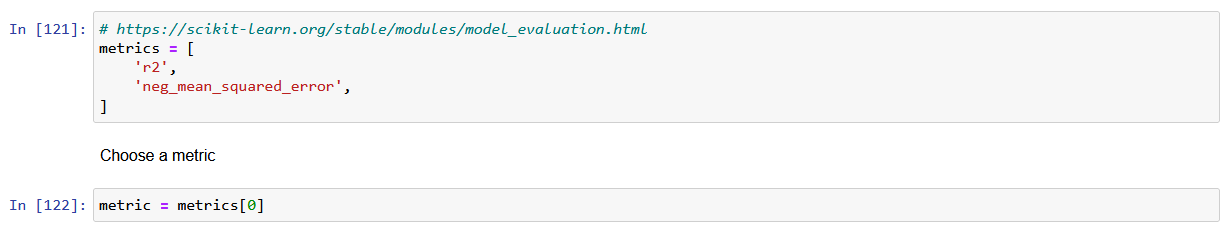

### Linear Regression

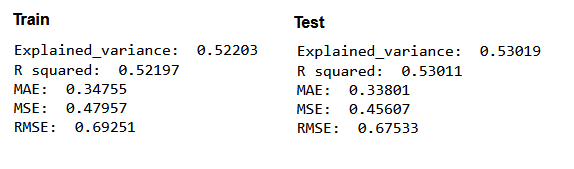

### Decision Tree Regressor - Initial model

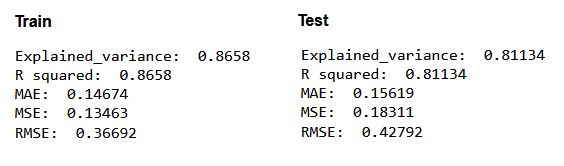

### Decision Tree Regressor - Best model

- Best model parameters
- Plot `max_depth` values / mean model's $r^2$ on cross validation

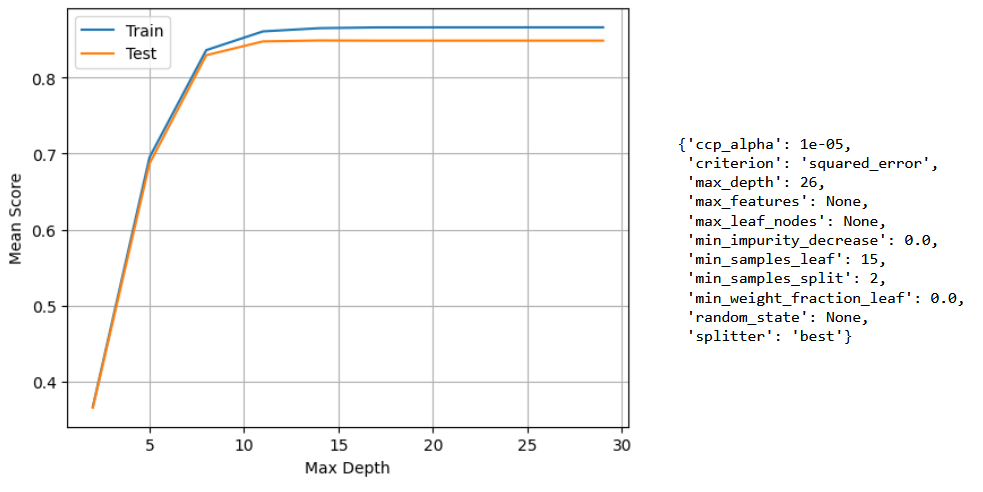

### Decision Tree Regressor - Best model

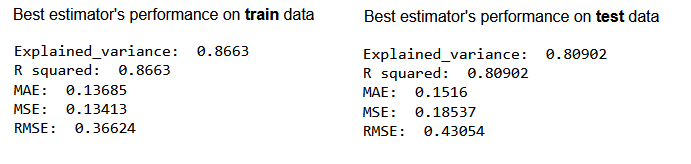

### Support Vector Regressor - Initial model

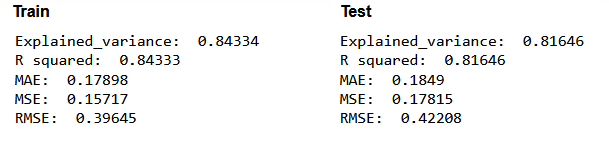

### Support Vector Regressor - Best model

- Best model parameters
- Plot `C` values / mean model's $r^2$ on cross validation

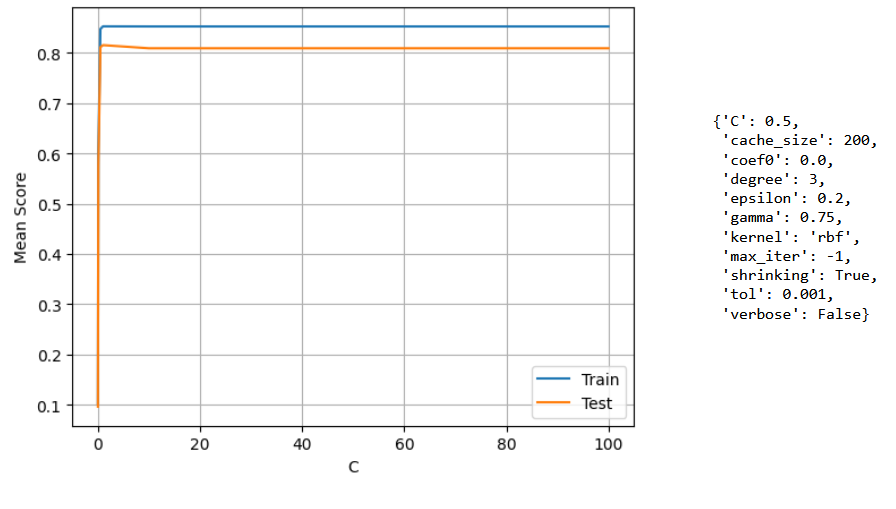

### Support Vector Regressor - Best model

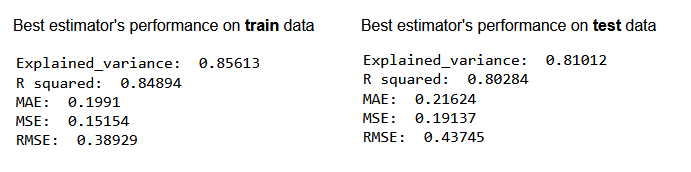

### Compare best models accuracy

- Linear Regression best: $r^2$: **0,53011**, $\mathrm{RMSE}$: **0,67533**
- <span style="color:red">**Decision Tree Regressor**</span> best: $r^2$: **0,80902**, $\mathrm{RMSE}$: **0,43054**
- Support Vector Regressor best: $r^2$: **0,80284**, $\mathrm{RMSE}$: **0,43745**

## Outlier Detection

We examine target variable **passenger count** in it's initial form

### Method 1: IQR
The transformed data approach normal distribution so we can use **zscore** to detect outliers with threshold **3**
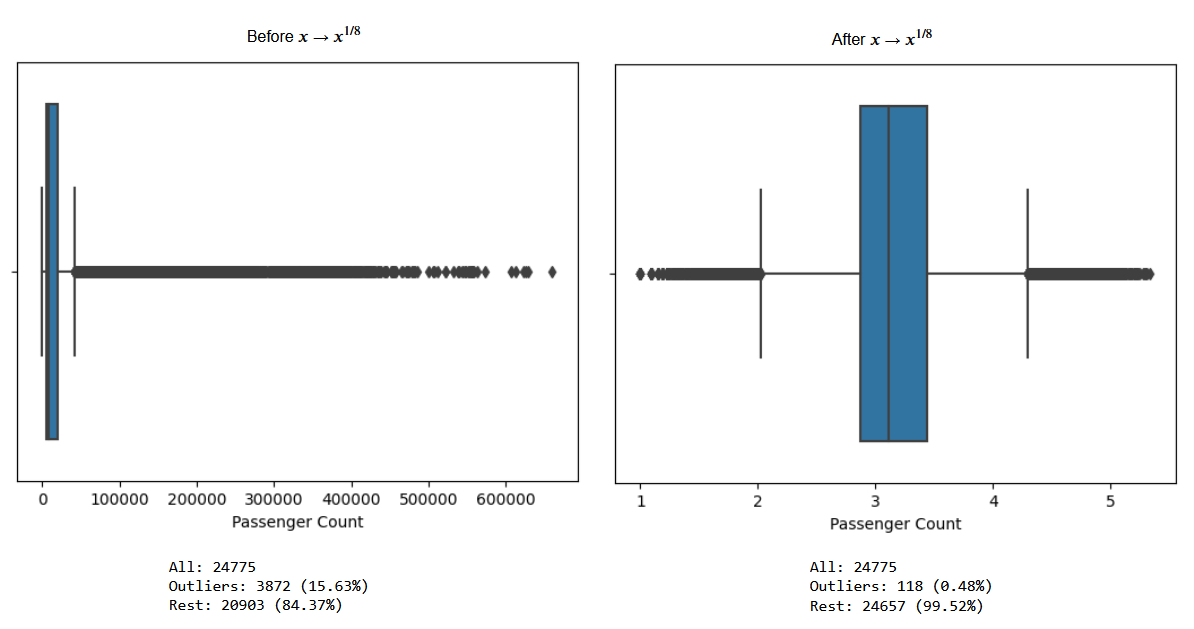

## Method 2 `IsolationForest`

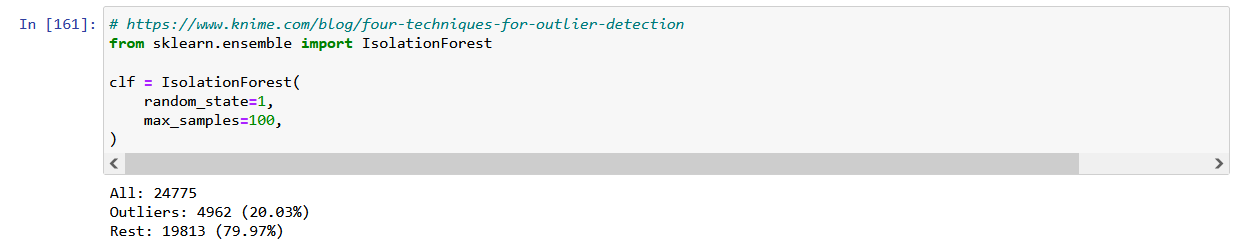

## Method 3 `DBSCAN`

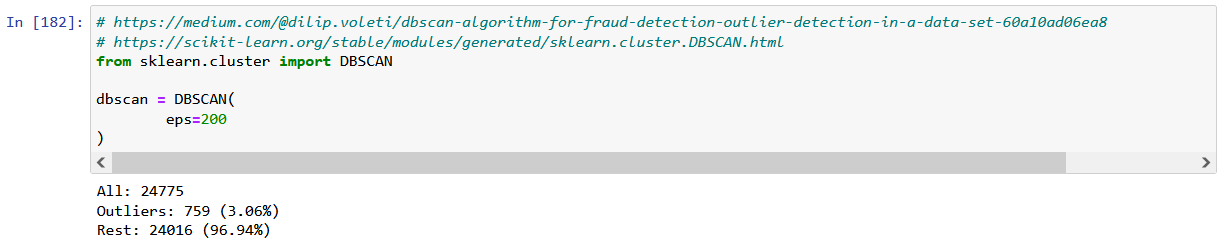

## Method 4 `DBSCAN`

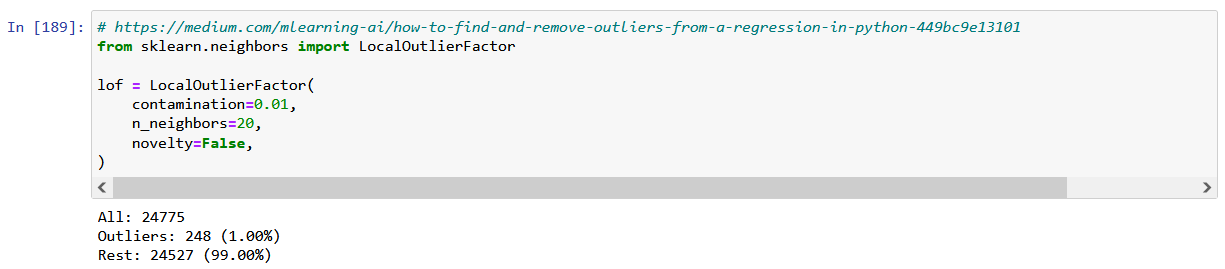

[**Other methods**](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/): `EllepticEnvelope`, `OneClassSVM`

**Further inspection of values**: (Per use case) Breakdown values by other fearure levels to check which values may be considered normal or not

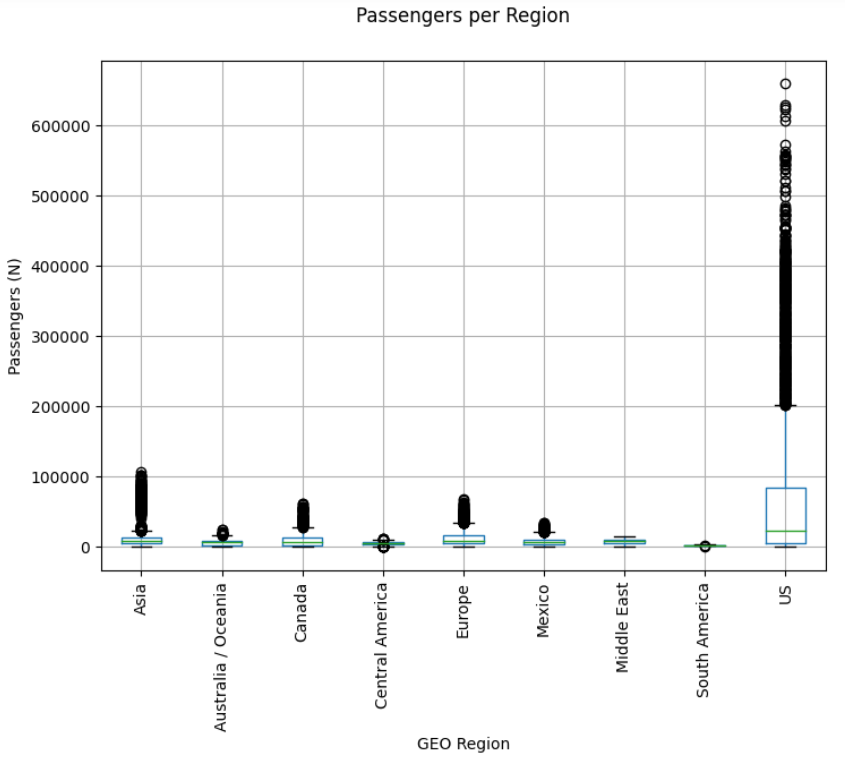